In [29]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

In [30]:
analytical_retardation_type = "langmuir"

Quantile values found: [75, 80, 80, 75, 95, 60, 60, 95, 85, 70, 70, 85, 65, 55, 90, 55, 90, 65]
Invalid data in file: /Users/r/Documents/stud/ss24/finnpinn/data_out new langmuir results/langmuir/default_finn/finn_stds_output_epochs_100/Y_pos_finn_quantile=60/predicted_retardations/retPred_100.npy
File not found: /Users/r/Documents/stud/ss24/finnpinn/data_out new langmuir results/langmuir/default_finn/finn_stds_output_epochs_100/Y_neg_finn_quantile=85/predicted_retardations/retPred_100.npy
Data for mode pos: 8 entries
Data for mode neg: 8 entries


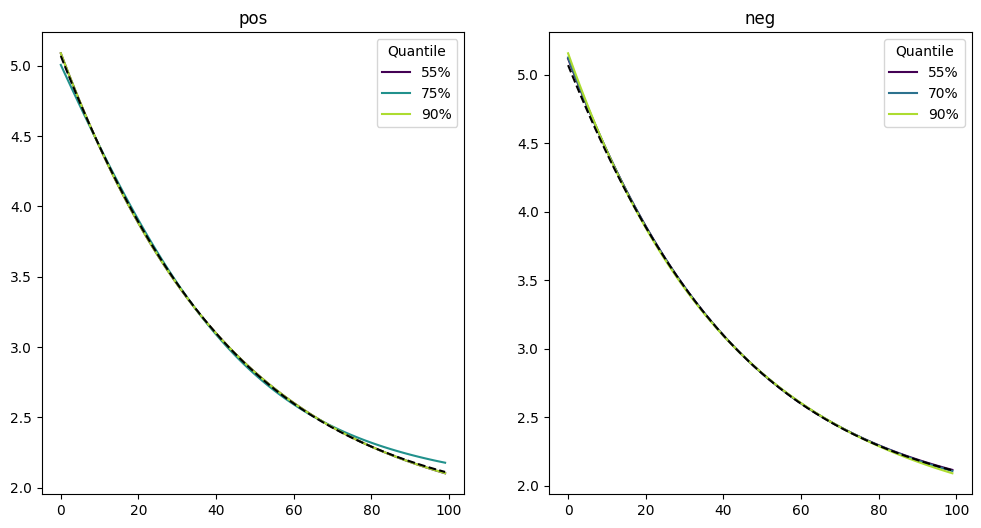

In [31]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# TODO: Redo those simulations
# base_path = Path(f"../data_out/{analytical_retardation_type}/default_finn/finn_stds_output").resolve()
# base_path = Path(f"../data_out_github_c/default_finn/finn_stds_output").resolve()
base_path = Path(f"../data_out new langmuir results/langmuir/default_finn/finn_stds_output_epochs_100/").resolve()
fig, (ax_pos, ax_neg) = plt.subplots(ncols=2, figsize=(12, 6))
colormap = plt.get_cmap("viridis")
quantile_values = []

# First pass to collect all quantile values
for p in base_path.iterdir():
    try:
        quantile_in_percent = int(p.name.split("=")[-1])
        quantile_values.append(quantile_in_percent)
    except ValueError:
        continue

if not quantile_values:
    print("No quantile values found.")
else:
    print(f"Quantile values found: {quantile_values}")

min_quantile = min(quantile_values)
max_quantile = max(quantile_values)

# Dictionary to store data for plotting later (to sort legends)
plot_data = {'pos': [], 'neg': []}

# Second pass to plot data
for p in base_path.iterdir():
    if p.name == "group_name.txt":
        continue
    quantile_in_percent = int(p.name.split("=")[-1])
    mode = "pos" if "pos" in p.name else "neg"
    
    try:
        ret = np.load(p / "predicted_retardations/retPred_100.npy")
    except FileNotFoundError:
        print(f"File not found: {p / 'predicted_retardations/retPred_100.npy'}")
        continue

    # Continue if any NaNs or Infs are found
    if np.any(np.isnan(ret)) or np.any(np.isinf(ret)):
        print(f"Invalid data in file: {p / 'predicted_retardations/retPred_100.npy'}")
        continue

    # Normalize the quantile to the range [0, 1] for colormap
    norm_quantile = (quantile_in_percent - min_quantile) / (max_quantile - min_quantile)
    color = colormap(norm_quantile)

    # Collect plot data
    plot_data[mode].append((quantile_in_percent, ret, color))

# Check if data is collected
for mode, data in plot_data.items():
    print(f"Data for mode {mode}: {len(data)} entries")

# Plot the data with sorted quantiles
for mode, data in plot_data.items():
    ax = ax_pos if mode == "pos" else ax_neg
    data.sort(key=lambda x: x[0])  # Sort by quantile
    for quantile_in_percent, ret, color in data[::3]:
        ax.plot(ret, color=color, label=f"{quantile_in_percent}%")
    ax.set_title(f"{mode}")
    ax.legend(title="Quantile")

ret_finn_mean = np.load(base_path.parent / "predicted_retardations/retPred_100.npy")
ax_pos.plot(ret_finn_mean, "k--")
ax_neg.plot(ret_finn_mean, "k--")

plt.show()

Invalid data in file: /Users/r/Documents/stud/ss24/finnpinn/data_out new langmuir results/langmuir/default_finn/finn_stds_output_epochs_100/Y_pos_finn_quantile=60/predicted_retardations/retPred_100.npy
File not found: /Users/r/Documents/stud/ss24/finnpinn/data_out new langmuir results/langmuir/default_finn/finn_stds_output_epochs_100/Y_neg_finn_quantile=85/predicted_retardations/retPred_100.npy


[]

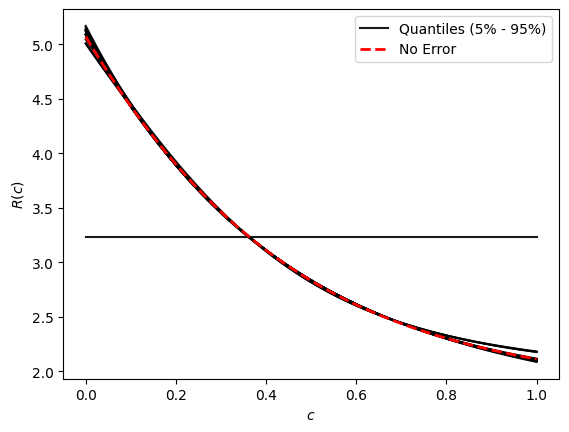

In [46]:
import itertools

fig, ax = plt.subplots()

ret_x = np.linspace(0,1,100)

all_rets = []
for i, (mode, quantile) in enumerate(itertools.product(["pos", "neg"], [55, 60, 65, 70, 75, 80, 85, 90, 95])):
    p = base_path / f"Y_{mode}_finn_quantile={quantile}"
    
    try:
        ret = np.load(p / "predicted_retardations/retPred_100.npy")
    except FileNotFoundError:
        print(f"File not found: {p / 'predicted_retardations/retPred_100.npy'}")
        continue

    # Continue if any NaNs or Infs are found
    if np.any(np.isnan(ret)) or np.any(np.isinf(ret)):
        print(f"Invalid data in file: {p / 'predicted_retardations/retPred_100.npy'}")
        continue

    # TODO: Check if this horizontal ret is really a converged FINN
    # if np.max(ret) < 3.5:
    #     continue

    quantile_label = quantile if mode == "pos" else 100 - quantile
    ax.plot(ret_x, ret, "k-", alpha=0.9, label="Quantiles (5% - 95%)" if i == 0 else "")

    all_rets.append(ret.ravel())

all_rets = np.array(all_rets)
ax.plot(ret_x, ret_finn_mean, "r--", label="No Error", lw=2)
plt.xlabel("$c$")
plt.ylabel("$R(c)$")
plt.savefig("../paper/figs/finn_synthetic_langmuir_c_pi3nnError.png")
plt.legend()
plt.plot()

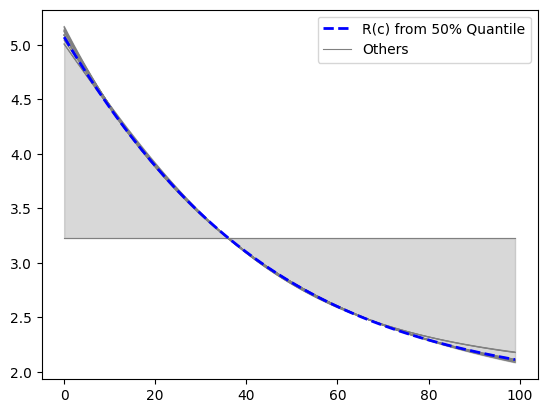

In [33]:
envelope_curve_up = np.max(all_rets, axis=0)
envelope_curve_down = np.min(all_rets, axis=0)

plt.plot(ret_finn_mean, "b--", lw=2, label="R(c) from 50% Quantile", zorder=10)
for i, ret in enumerate(all_rets):
    plt.plot(ret, alpha=1.0, color="grey", lw=.8, label="" if i != 0 else "Others")
plt.fill_between(x=np.arange(envelope_curve_up.shape[0]), y1=envelope_curve_down, y2=envelope_curve_up, color='grey', alpha=0.3)
plt.legend()
plt.show()

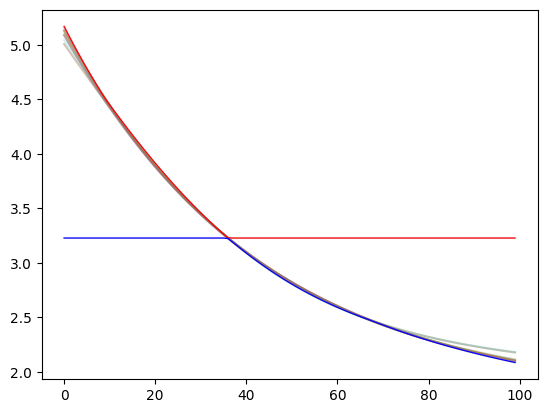

In [34]:

lines = plt.plot(all_rets.T, alpha=0.2)
plt.plot(envelope_curve_up, "r-", lw=0.9)
plt.plot(envelope_curve_down, "b-", lw=0.9)
plt.show()

# Pair Quantiles Plot

In [35]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

quantile_values = {"pos": [], "neg": []}

# First pass to collect all quantile values
for p in base_path.iterdir():
    # If training did not make it to 100 epochs then continue
    try:
        ret = np.load(p / "predicted_retardations/retPred_100.npy")
    except FileNotFoundError:
        print(f"File not found: {p / 'predicted_retardations/retPred_100.npy'}")
        continue

    # Continue if any NaNs or Infs are found
    if np.any(np.isnan(ret)) or np.any(np.isinf(ret)):
        print(f"Invalid data in file: {p / 'predicted_retardations/retPred_100.npy'}")
        continue

    try:
        quantile_in_percent = int(p.name.split("=")[-1])
        mode = "pos" if "pos" in p.name else "neg"
        quantile_values[mode].append(quantile_in_percent)
    except ValueError:
        continue


# Sort quantile values
quantile_values["neg"].sort()
quantile_values["pos"].sort()
print(f"Sorted quantile values: {quantile_values}")

# Create pairs of neighboring quantiles
quantile_step = 4
quantile_pairs = {mode: [(quantile_values[mode][i], quantile_values[mode][i+quantile_step]) for i in range(len(quantile_values[mode]) - quantile_step)] for mode in quantile_values}
print(f"{quantile_pairs=}")
num_pairs = max(len(quantiles) for quantiles in quantile_pairs.values())

ret_finn_mean = np.load(base_path / "predicted_retardations/retPred_100.npy")

fig, axs = plt.subplots(nrows=num_pairs, ncols=2, figsize=(12, num_pairs * 3))

# Plot the data with sorted quantiles
for col, mode in enumerate(quantile_pairs):
    for pair_idx, (q1, q2) in enumerate(quantile_pairs[mode]):
        ax = axs[pair_idx, col]
        q1_dir = base_path / f"Y_{mode}_finn_quantile={q1}"
        q2_dir = base_path / f"Y_{mode}_finn_quantile={q2}"
        q1_data = np.load(q1_dir / "predicted_retardations/retPred_100.npy")
        q2_data = np.load(q2_dir / "predicted_retardations/retPred_100.npy")

        # should be positive for mode=="pos" (left) and negative for mode=="neg" (right)
        ax.plot(q2_data-q1_data, "r-", label=f"{q2}-{q1}")
        ax.hlines(0, 100, 0, color="k", linestyles="--")

        # ax.plot(q1_data, "r-", label=f"{q1}%")
        # ax.plot(q2_data, "b-", label=f"{q2}%")
        # ax.plot(ret_finn_mean, "k--", label="Mean")

        ax.set_title(f"{mode} quantiles {q1}% & {q2}%")
        ax.legend(title="Quantile")

plt.tight_layout()
plt.show()

NotADirectoryError: [Errno 20] Not a directory: '/Users/r/Documents/stud/ss24/finnpinn/data_out new langmuir results/langmuir/default_finn/finn_stds_output_epochs_100/group_name.txt/predicted_retardations/retPred_100.npy'